In [83]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from utils import plot_mean_bar

# Notebook Settings
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [8, 5]

**Dislaimer**: O texto em portugues contem diversas omissoes de acentuacao devido a este notebook estar sendo escrito em um teclado nordico. Deste modo, escrever å eh mais facil do que escrever ç. Perdoem-me :) 

# 1. Construindo o Primeiro Modelo

Comecaremos explorando o *dataset* studentInfo pois achamos que ele eh a espinha dorsal do primeiro modelo que construiremos para resolver a questao de negocios que iremos resolver: **Quais estudantes irao falhar no Exame Final?** 

Responder a essa pergunta com antecedencia pode ajudar alguns estudantes a desvia-los do desfecho negativo. 

In [11]:
info = pd.read_csv("../studentInfo.csv")

In [49]:
f'Info Dataset Contem {info.shape[0]} linhas e {info.shape[1]} colunas'

'Info Dataset Contem 32593 linhas e 12 colunas'

In [13]:
info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [90]:
info.dtypes

code_module             object
code_presentation       object
id_student               int64
gender                  object
region                  object
highest_education       object
imd_band                object
age_band                object
num_of_prev_attempts     int64
studied_credits          int64
disability              object
final_result            object
dtype: object

In [34]:
info['id_student'].nunique() == info.shape[0]

False

Ha registros de estudantes duplicados. Estudantes repetindo modulos? Provavelmente sim.  

In [47]:
duplicated_mask = info['id_student'].duplicated(keep = False)
info_duplicated = info[duplicated_mask]
info_duplicated.sort_values('id_student').head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
14395,DDD,2013J,8462,M,London Region,HE Qualification,30-40%,55<=,0,90,N,Withdrawn
17560,DDD,2014J,8462,M,London Region,HE Qualification,30-40%,55<=,1,60,N,Withdrawn
13091,DDD,2013B,24213,F,East Anglian Region,A Level or Equivalent,40-50%,0-35,0,90,N,Withdrawn
16332,DDD,2014B,24213,F,East Anglian Region,A Level or Equivalent,40-50%,0-35,1,60,N,Pass
2517,BBB,2013J,25629,F,Scotland,Lower Than A Level,20-30%,0-35,0,120,N,Withdrawn


In [61]:
f'{info_duplicated.query("num_of_prev_attempts >=1").shape[0]} estudantes repetiram modulos ao menos uma vez'

'1667 estudantes repetiram modulos ao menos uma vez'

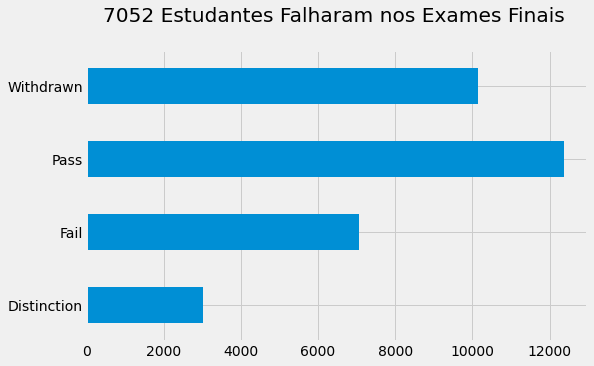

In [84]:
final_results = Counter(info['final_result'])
ax = (info
      .groupby('final_result')['final_result']
      .size()
      .plot(kind = "barh"))
_= ax.set_ylabel("")
_= ax.set_title(str(final_results['Fail']) + ' Estudantes Falharam nos Exames Finais \n')

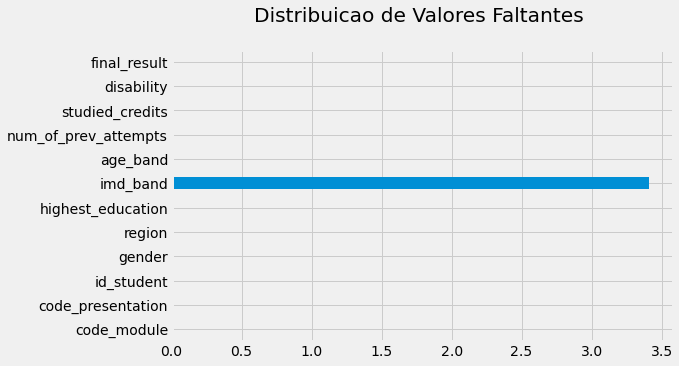

In [89]:
# Checando Valores Faltantes
ax = (info
.isna()
 .mean()
 .mul(100)
 .plot(kind = "barh"))
_= ax.set_title("Distribuicao de Valores Faltantes \n")